In [20]:
# import library, pandas to read the dataset, matplotlib to visualize data, and re to clean the text 
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Collect and Explore The Data

In [4]:
# read data stored in path 'root/Data/' using pd.read_csv, then store the data in df dataframe
df = pd.read_csv('Data/vaccination_all_tweets.csv')

In [5]:
#show first five dataframe content 
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [6]:
# explore the data type at each series
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193272 entries, 0 to 193271
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193272 non-null  int64 
 1   user_name         193271 non-null  object
 2   user_location     134699 non-null  object
 3   user_description  179542 non-null  object
 4   user_created      193272 non-null  object
 5   user_followers    193272 non-null  int64 
 6   user_friends      193272 non-null  int64 
 7   user_favourites   193272 non-null  int64 
 8   user_verified     193272 non-null  bool  
 9   date              193272 non-null  object
 10  text              193272 non-null  object
 11  hashtags          152299 non-null  object
 12  source            193153 non-null  object
 13  retweets          193272 non-null  int64 
 14  favorites         193272 non-null  int64 
 15  is_retweet        193272 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

the output of the cell above shows that all most features have object types except the following:

- ``id`` which is int refers to the unique number for each row (key of this row). 

- ```user_followers``` also has int type, it contains the number of followers of the user that tweeted the tweet. 

- ```user_friends``` This value refers to how many people this user has followed. 

- ```user_favourites``` it also has int type, where it refer to user favourites not the favourites of this tweet. 

- In ```user_verified``` there is a bool type, which contains a true flag if the account was verified. 

- ```retweets``` and ```favorites``` these numbers indicate how many people have retweeted or favorited this tweet. 

- ```is_retweet``` boolean flag indicates if the user tweeted the tweet by them self's or retweeted it.

the other features that have object type such as: 

- ```user_name``` contains a string, indicates the user name in Twitter. It is possible to duplicate this value since one user may tweet many tweets.  

- ```user_location``` this feature indicates the user location at the time of the Tweet. This feature is possible to be null, where the user didn't share the location information. 

- ```user_description``` user-defined UTF-8 string describing their account. It could be null. 

- ```user_created``` contains the date of created this account. 

- ```date``` the tweet's date and time. 

- ```text``` this is one of the most important features, containing the tweet text. 

- ```hashtags``` written with a # symbol—is used to index keywords or topics on Twitter. This feature could be null. 

- ```source```  the Tweet source label provides information about how the Tweet was posted.

In [7]:
# check to null values 
df.isna().sum()

id                      0
user_name               1
user_location       58573
user_description    13730
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            40973
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

The output above shows null values for ```user_description, hashtags``` and ```source``` all of this is not significant nor appropriate for analysis.

The ```user_location``` may be used in analysis... 

In [8]:
# the user_location contains detailed information, for that, I just take the country name 
df['country_name']=df['user_location'].str.split(',').str[-1]

In [9]:
# check on columns 
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'country_name'],
      dtype='object')

In [10]:
# convert the date into datetime object 
df['date'] = pd.to_datetime(df['date']).dt.date

In [11]:
# counting the unique values of hashtags
df['hashtags'].value_counts()

['COVAXIN', 'BBMP']                                   11113
['Moderna']                                            8995
['COVAXIN']                                            8746
['Covaxin']                                            7033
['SputnikV']                                           5106
                                                      ...  
['Lutyens', 'BharatBiotech', 'COVAXIN', 'loafers']        1
['Moderna', 'Covid', 'France']                            1
['Chinese', 'vaccines', 'Sinopharm']                      1
['CoronaVirusUpdate']                                     1
['Seychelles', 'COVID19']                                 1
Name: hashtags, Length: 52470, dtype: int64

In [12]:
# check how many users that verified them account
df['user_verified'].value_counts()

False    176937
True      16335
Name: user_verified, dtype: int64

In [13]:
df['user_verified'].mean()*100

8.45181919781448

Only 8.45% of accounts have been verified, as shown above.

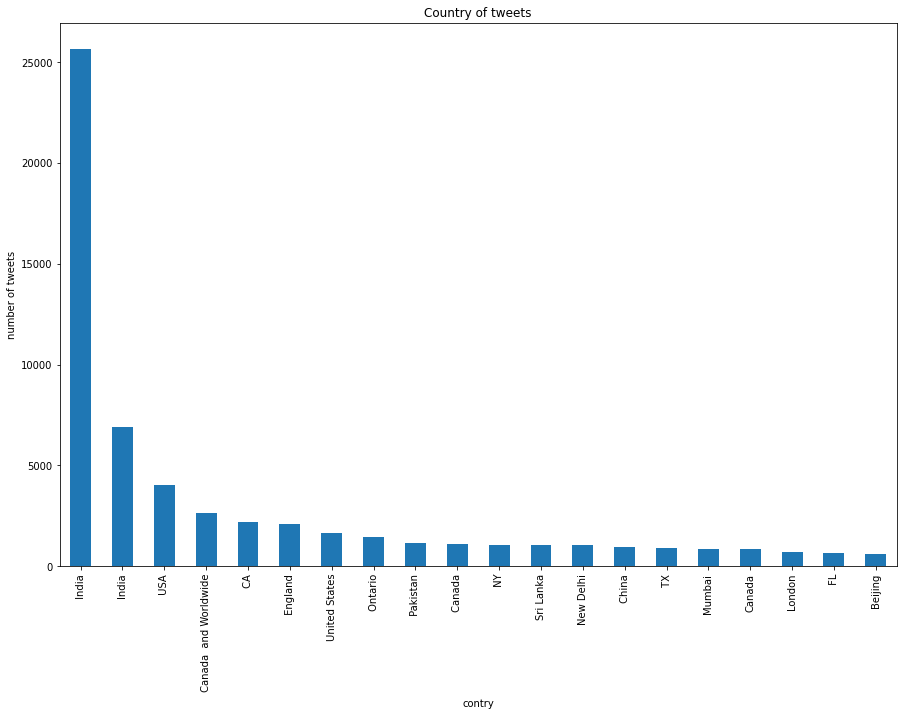

In [14]:
plt.figure(figsize=(15,10))
df['country_name'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Country of tweets')
plt.xlabel('contry')
plt.ylabel('number of tweets');

The figure of Country of tweets illustrates all most the collected tweets were from India 

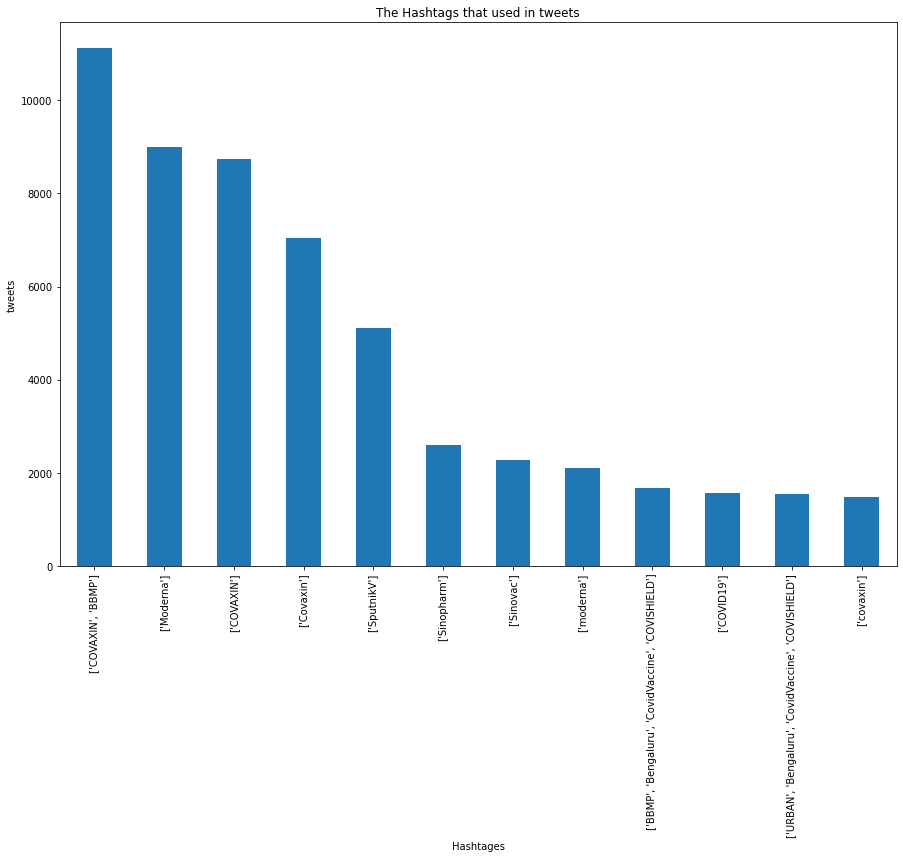

In [15]:
#Visualizing Tweet Platform-wise Distribution 
plt.figure(figsize=(15,10))
df['hashtags'].value_counts().nlargest(12).plot(kind='bar')
plt.xticks(rotation=90)
plt.title('The Hashtags that used in tweets')
plt.xlabel('Hashtages')
plt.ylabel('tweets');


In [16]:
lemmatizer = WordNetLemmatizer()
def clean_data(text):
    text = re.sub(r'@\w+', '', text) # remove mintions 
    text = re.sub(r'#', '', text) # remove hashtages 
    text = re.sub(r'RT[\s]+', '', text) # remove RT notaitions 
    text = re.sub(r'https?:\/\/\S+', '', text) # remove URLs
    text = text.encode('ascii', 'ignore').decode('ascii') # remove emoji
    text = text.lower() #convert the text to lower case 
    text = text.split() #splitting the text 
    text = [word for word in text if word not in stopwords.words('english')] # remove stop words 
    text = [lemmatizer.lemmatize(word) for word in text] 
    text = ' '.join(text)
    return text

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [24]:
# Clean the text of tweet 
df['clean_text'] = df['text'].apply(clean_data)
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,country_name,clean_text
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,CA,folk said daikon paste could treat cytokine st...
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,CA,"world wrong side history year, hopefully, bigg..."
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,Your Bed,coronavirus sputnikv astrazeneca pfizerbiontec...
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,BC - Canada,"fact immutable, senator, even ethically sturdy..."
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,NaN,explain need vaccine whereareallthesickpeople ...


In [25]:
def refer(tweet, refs):
  flag =0
  for ref in refs:
    if tweet.find(ref) != -1:
      flag =1
  return flag

pfizer_refs = ["Pfizer","pfizer","Pfizer–BioNTech","pfizer-bioNtech","BioNTech","biontech"]
bbiotech_refs = ["covax","covaxin","Covax","Covaxin","Bharat Biotech","bharat biotech","BharatBiotech","bharatbiotech"]
sputnik_refs = ["russia","sputnik","Sputnik","V"]
astra_refs = ['sii','SII','adar poonawalla','Covishield','covishield','astra','zenca','Oxford–AstraZeneca','astrazenca','oxford-astrazenca','serum institiute']
moderna_refs = ['moderna','Moderna','mRNA-1273','Spikevax']

df['pfizer'] = df['clean_text'].apply(lambda x : refer(x, pfizer_refs))
df['bbiotech'] = df['clean_text'].apply(lambda x : refer(x, bbiotech_refs))
df['sputnik'] = df['clean_text'].apply(lambda x : refer(x, sputnik_refs))
df['astra'] = df['clean_text'].apply(lambda x : refer(x, astra_refs))
df['moderna'] = df['clean_text'].apply(lambda x : refer(x, moderna_refs))

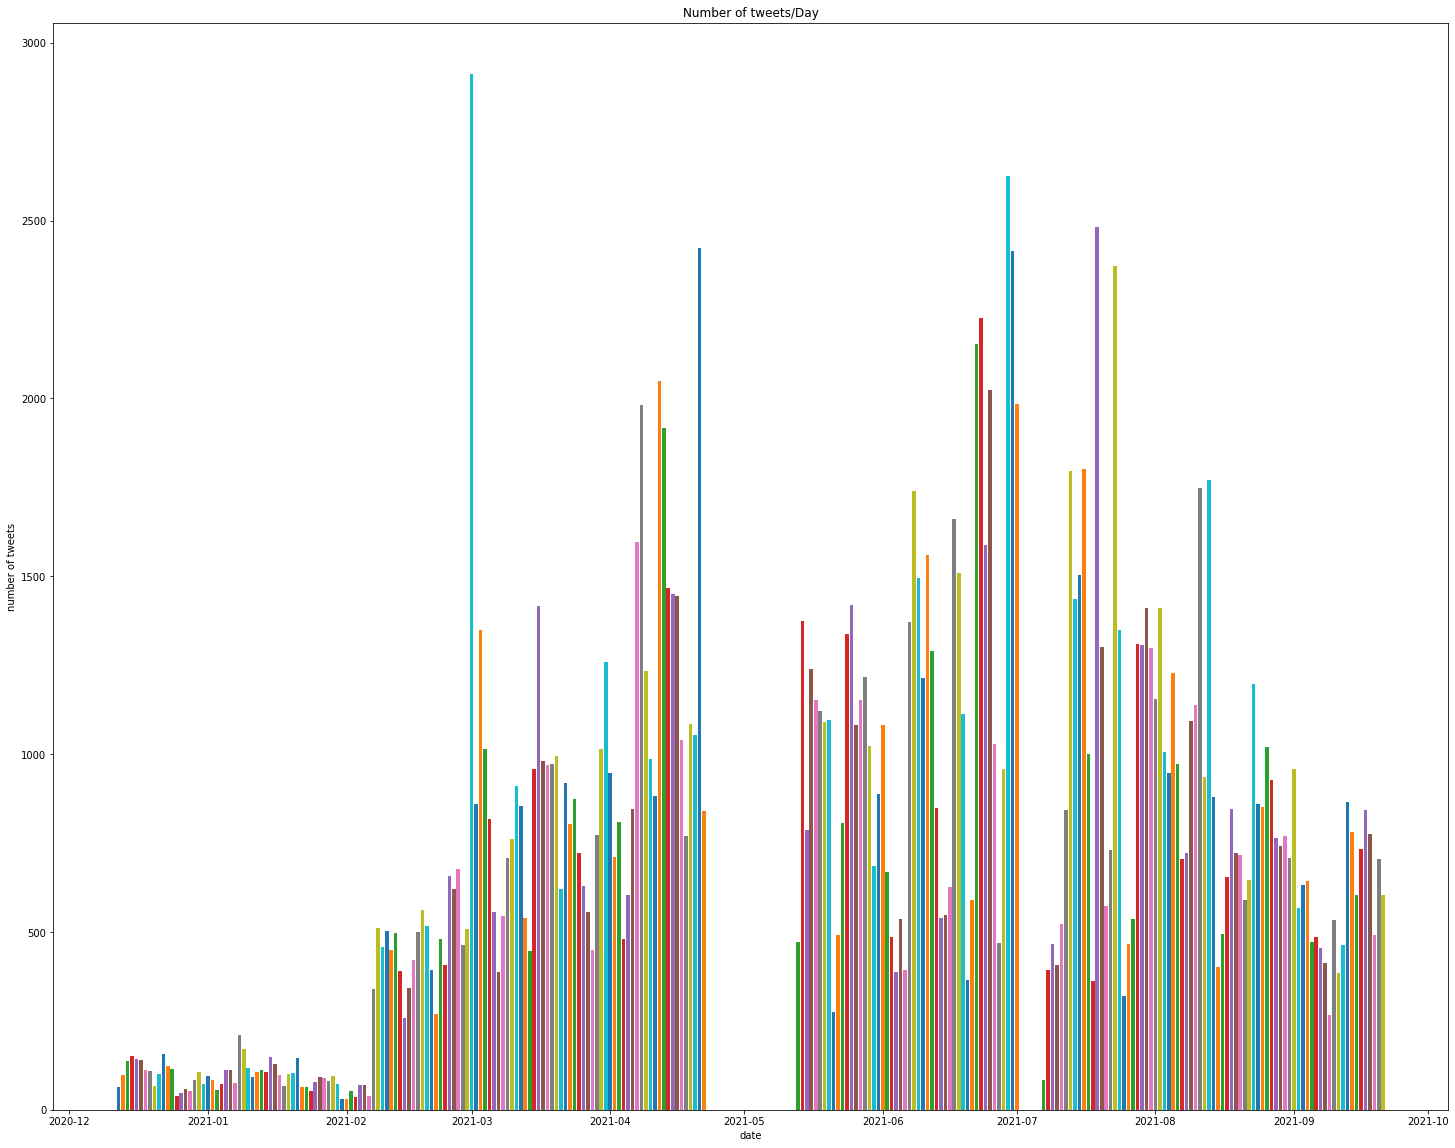

In [26]:
plt.figure(figsize=(25,20))
for i, group in df.groupby('date'):
    plt.bar(group['date'].iloc[0],group['clean_text'].count())
plt.ylabel('number of tweets')
plt.xlabel('date')
plt.title('Number of tweets/Day'); 

### Modify on dataframe

In [27]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,country_name,clean_text,pfizer,bbiotech,sputnik,astra,moderna
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,CA,folk said daikon paste could treat cytokine st...,1,0,0,0,0
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,CA,"world wrong side history year, hopefully, bigg...",0,0,0,0,0
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,Your Bed,coronavirus sputnikv astrazeneca pfizerbiontec...,1,0,1,1,1
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,BC - Canada,"fact immutable, senator, even ethically sturdy...",0,0,0,0,0
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,NaN,explain need vaccine whereareallthesickpeople ...,1,0,0,0,0


In [28]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'country_name', 'clean_text', 'pfizer', 'bbiotech',
       'sputnik', 'astra', 'moderna'],
      dtype='object')

In [29]:
(df.drop(columns={'user_name', 'user_location', 'user_description', 'user_created',
                    'user_followers', 'user_friends', 'user_favourites', 'user_verified',
                    'text', 'source', 'retweets', 'favorites','is_retweet'}, inplace=True))

In [30]:
df.head()

,id,date,hashtags,country_name,clean_text,pfizer,bbiotech,sputnik,astra,moderna
0,1340539111971516416,2020-12-20,['PfizerBioNTech'],CA,folk said daikon paste could treat cytokine st...,1,0,0,0,0
1,1338158543359250433,2020-12-13,NaN,CA,"world wrong side history year, hopefully, bigg...",0,0,0,0,0
2,1337858199140118533,2020-12-12,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Your Bed,coronavirus sputnikv astrazeneca pfizerbiontec...,1,0,1,1,1
3,1337855739918835717,2020-12-12,NaN,BC - Canada,"fact immutable, senator, even ethically sturdy...",0,0,0,0,0
4,1337854064604966912,2020-12-12,"['whereareallthesickpeople', 'PfizerBioNTech']",NaN,explain need vaccine whereareallthesickpeople ...,1,0,0,0,0


In [31]:
df.columns

Index(['id', 'date', 'hashtags', 'country_name', 'clean_text', 'pfizer',
       'bbiotech', 'sputnik', 'astra', 'moderna'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193272 entries, 0 to 193271
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            193272 non-null  int64 
 1   date          193272 non-null  object
 2   hashtags      152299 non-null  object
 3   country_name  134699 non-null  object
 4   clean_text    193272 non-null  object
 5   pfizer        193272 non-null  int64 
 6   bbiotech      193272 non-null  int64 
 7   sputnik       193272 non-null  int64 
 8   astra         193272 non-null  int64 
 9   moderna       193272 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 14.7+ MB


In [33]:
df.isna().sum()

id                  0
date                0
hashtags        40973
country_name    58573
clean_text          0
pfizer              0
bbiotech            0
sputnik             0
astra               0
moderna             0
dtype: int64

In [36]:
# to save the cleaned data 
df.to_csv('Data/cleaned_data.csv')

# Labelling the data 

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [39]:
df['label_sent'] = df['clean_text'].apply(lambda x: 1 if sent.polarity_scores(x)['compound']>0 else 0) 

In [40]:
df.head()

,id,date,hashtags,country_name,clean_text,pfizer,bbiotech,sputnik,astra,moderna,label_sent
0,1340539111971516416,2020-12-20,['PfizerBioNTech'],CA,folk said daikon paste could treat cytokine st...,1,0,0,0,0,1
1,1338158543359250433,2020-12-13,NaN,CA,"world wrong side history year, hopefully, bigg...",0,0,0,0,0,0
2,1337858199140118533,2020-12-12,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Your Bed,coronavirus sputnikv astrazeneca pfizerbiontec...,1,0,1,1,1,1
3,1337855739918835717,2020-12-12,NaN,BC - Canada,"fact immutable, senator, even ethically sturdy...",0,0,0,0,0,0
4,1337854064604966912,2020-12-12,"['whereareallthesickpeople', 'PfizerBioNTech']",NaN,explain need vaccine whereareallthesickpeople ...,1,0,0,0,0,0


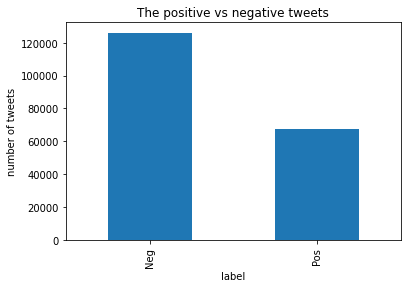

In [41]:
df['label_sent'].value_counts().plot(kind='bar')
plt.title('The positive vs negative tweets')
plt.xlabel('label')
plt.xticks([0, 1],['Neg', 'Pos'])
plt.ylabel('number of tweets');


In [42]:
from textblob import TextBlob

In [43]:
def generate_label(x):
    return 1 if TextBlob(x).polarity>0 else 0

In [44]:
df['blob_label'] = df['clean_text'].apply(lambda x: generate_label(x))

In [46]:
df.to_csv("Data/VaccinesData.csv", index=False)

In [47]:
X = df.clean_text
Y = df.label_sent
print("Data shapes: ", X.shape, Y.shape)

Data shapes:  (193272,) (193272,)


Split the data

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

In [49]:
X_train.shape, X_test.shape

((144954,), (48318,))

In [50]:
y_train_blob, y_test_blob = train_test_split(df['blob_label'], test_size=0.25, random_state=123)

apply veectorzition on text

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer()

In [52]:
X_train = tfv.fit_transform(X_train)

In [53]:
X_test = tfv.transform(X_test)

# Models

Train a naive bayes on ```SentimentIntensityAnalyzer``` labels

In [54]:
from sklearn.naive_bayes import MultinomialNB
nb_sent = MultinomialNB()
nb_sent.fit(X_train, y_train)
print(f'naive bayes accuracy on SentimentIntensityAnalyzer labels {nb_sent.score(X_test, y_test)}')

naive bayes accuracy on SentimentIntensityAnalyzer labels 0.8874746471294341


Train a random forest on ```SentimentIntensityAnalyzer``` labels

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_sent = RandomForestClassifier(random_state = 123)
rf_sent.fit(X_train, y_train)
print(f'random forest accuracy on SentimentIntensityAnalyzer labels {rf_sent.score(X_test, y_test)}')

random forest accuracy on SentimentIntensityAnalyzer labels 0.9453826731238876


In [60]:
from sklearn.metrics import classification_report
y_pred = nb_sent.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92     31414
           1       0.87      0.80      0.83     16904

    accuracy                           0.89     48318
   macro avg       0.88      0.87      0.87     48318
weighted avg       0.89      0.89      0.89     48318



In [61]:
from sklearn.metrics import classification_report
y_pred = rf_sent.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     31414
           1       0.91      0.93      0.92     16904

    accuracy                           0.95     48318
   macro avg       0.94      0.94      0.94     48318
weighted avg       0.95      0.95      0.95     48318



Train a naive bayes on ```TextBlob``` labels

In [59]:
nb_blob = MultinomialNB()
nb_blob.fit(X_train, y_train_blob)
print(f'naive bayes accuracy on TextBlob labels {nb_blob.score(X_test, y_test_blob)}')

naive bayes accuracy on TextBlob labels 0.9005546587193178


In [62]:
from sklearn.metrics import classification_report
y_pred = nb_blob.predict(X_test)
print(classification_report(y_test_blob, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     31983
           1       0.88      0.82      0.85     16335

    accuracy                           0.90     48318
   macro avg       0.89      0.88      0.89     48318
weighted avg       0.90      0.90      0.90     48318



Train a random forest on ```textBlob``` labels

In [63]:
rf_blob = RandomForestClassifier(random_state = 123)
rf_blob.fit(X_train, y_train_blob)
print(f'random forest accuracy on TextBlob labels {rf_blob.score(X_test, y_test_blob)}')

random forest accuracy on TextBlob labels 0.9686866178235854


In [64]:
from sklearn.metrics import classification_report
y_pred = rf_blob.predict(X_test)
print(classification_report(y_test_blob, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     31983
           1       0.95      0.96      0.95     16335

    accuracy                           0.97     48318
   macro avg       0.96      0.97      0.97     48318
weighted avg       0.97      0.97      0.97     48318



Save the highest accuracy model

In [65]:
import pickle 
with open("Models/rf.pkl", "wb") as f:
    pickle.dump(rf_blob, f)

# create Pipeline 

In [66]:
from sklearn.pipeline import Pipeline

In [69]:
# from sklearn import set_config
# set_config(display='diagram')

In [71]:
vectorize_pipeline = Pipeline(steps=[('vect', tfv)])

In [72]:
vectorize_pipeline

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None))],
         verbose=False)

In [73]:
pipeline = Pipeline(steps=[('vec',vectorize_pipeline), ('model', rf_blob)])

In [74]:
pipeline

Pipeline(memory=None,
         steps=[('vec',
                 Pipeline(memory=None,
                          steps=[('vect',
                                  TfidfVectorizer(analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.float64'>,
                                                  encoding='utf-8',
                                                  input='content',
                                                  lowercase=True, max_df=1.0,
                                                  max_features=None, min_df=1,
                                                  ngram_range=(1, 1), norm='l2',
                                                  preprocessor=None,
                                                  smooth_idf=True,
                                                  stop_words=None,
                                                  strip_accent

In [75]:
from joblib import dump
dump(pipeline, 'Deployment/rf_pipeline.pkl')

['rf_pipeline.pkl']